In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

## **0. Introduction**

**VehicleTrader-Regression: Machine Learning on sales** is a regression project kernel which focuses on **Data understanding**, **Data exploration and preparation**, **Data cleaning and preparation** and **Models building and evaluation**.

**VehicleTrader-Dataset** is a great dataset to apply domain knowledge for feature engineering, so I made a research and learned a lot about the AutoTrader company. I was able to access the UK website (https://www.autotrader.co.uk/) and discovered they deal in a variety of vehicles from new to old, and even exotic to regular, they are also into body types ranging between Cars, Luxury cars, Vans, Bikes, Motorhomes, Caravans and Trucks. 

With over 430k vehicles on the UK version I tried to find out some of those links between the columns and factors that had pricing of vehicles, also discovering that individuals are also allowed to post their listings on the platform. 


###  **1. Understanding data columns**

* `public_reference` Unable to get actionable information on this variable
* `reg_code` Unable to get actionable information on this variable
* `mileage` Distance the vehicle has travelled throughout it's lifetime in miles (Lower is usually better)
* `standard_colour` Body paint color of vehicle at time of sale (5-total)
    - **Grey**
    - **Blue**
    - **Black**
    - **Silver**
    - **White**
* `standard_make` Manufacturer name of vehicle (11-total).

['MINI', 'Volkswagen', 'Mercedes-Benz', 'Vauxhall', 'Nissan',
       'Toyota', 'Audi', 'Renault', 'BMW', 'Fiat', 'Kia']
* `standard_model` Model name as stated by manufacturer for target vehicle (19-total).
['Hatch', 'Golf', 'C Class', 'Corsa', 'Qashqai', 'Yaris', 'Polo',
       'Astra', 'A1', 'E Class', 'Clio', 'A Class', '5 Series',
       '1 Series', '500', 'A3', 'Sportage', '3 Series', 'Juke']
* `vehicle_condition` Whether vehicle has had a prior owner or not, all vehicles in dataset are used.
    - **USED**
* `year_of_registration` Year of first registration of vehicle.
* `body_type` body shape of vehicle in question.
    - **Hatchback**
    - **Estate**
    - **Saloon**
    - **SUV**
    - **Coupe**
* `crossover_car_and_van` If car is a crossover or a van type vehicle:
    - **False**
* `fuel_type` (Fuel type) describes what type of fuel that propels the vehicle (**Fuel**, **Diesel**).
* `make_model` A combination of the make and model columns
* `age` An extrapolation from the registration date, (Current year - Reg year).

### **2. Data Exploration and Preparation**

In [2]:
data = pd.read_csv("vehicle_trade_data.csv")
data

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type,make_model,age
0,202010014440649,31534.0,17,Grey,MINI,Hatch,USED,2017.0,19000,Hatchback,False,Petrol,MINI - Hatch,5
1,202010155026725,52023.0,66,Blue,Volkswagen,Golf,USED,2016.0,13500,Estate,False,Diesel,Volkswagen - Golf,6
2,202008142485309,29500.0,12,Grey,Mercedes-Benz,C Class,USED,2012.0,9495,Saloon,False,Petrol,Mercedes-Benz - C Class,10
3,202009183894045,35300.0,18,Grey,Vauxhall,Corsa,USED,2018.0,7293,Hatchback,False,Petrol,Vauxhall - Corsa,4
4,202010014441671,47299.0,65,Black,Nissan,Qashqai,USED,2016.0,11500,SUV,False,Diesel,Nissan - Qashqai,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96264,202010295556637,28225.0,17,White,Mercedes-Benz,C Class,USED,2017.0,18499,Saloon,False,Diesel,Mercedes-Benz - C Class,5
96265,202010305614799,122000.0,07,Silver,BMW,3 Series,USED,2007.0,1990,Saloon,False,Petrol,BMW - 3 Series,15
96266,202010315639231,45000.0,15,Silver,Vauxhall,Corsa,USED,2015.0,5000,Hatchback,False,Petrol,Vauxhall - Corsa,7
96267,202010315647416,4075.0,69,Grey,Nissan,Juke,USED,2019.0,18000,SUV,False,Petrol,Nissan - Juke,3


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96269 entries, 0 to 96268
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   public_reference       96269 non-null  int64  
 1   mileage                96247 non-null  float64
 2   reg_code               96257 non-null  object 
 3   standard_colour        96269 non-null  object 
 4   standard_make          96269 non-null  object 
 5   standard_model         96269 non-null  object 
 6   vehicle_condition      96269 non-null  object 
 7   year_of_registration   96269 non-null  float64
 8   price                  96269 non-null  int64  
 9   body_type              96269 non-null  object 
 10  crossover_car_and_van  96269 non-null  bool   
 11  fuel_type              96269 non-null  object 
 12  make_model             96269 non-null  object 
 13  age                    96269 non-null  int64  
dtypes: bool(1), float64(2), int64(3), object(8)
memory usa

### **2.1 Quantitative and qualitative data**

We shall proceed to look at statistics of both the `qualitative` and `numeric` values in order to further appreciate the data.

#### 2.1.1 Quantitative

- `Mileage` has a total of 96247 non null entries which is short of the grand total of the entire dataset indicating the prescence of missing values and carries metrics as follows:
  - `Average Mileage` = 42964.06
  - `Max Mileage`     = 999999
  - `S-Deviation`     = 34051.70

  <em>`Mileage has outliers which would have to be handled.`</em>
  
- `Year Of Reg.` has a total of 96269 non null entries, meaning no missing values and carries metrics as follows:
  - `Average Year` = 2015
  - `Max Year`     = 2020
  - `S-Deviation` = 3.7

- `Age` has a total of 96269 non null entries, meaning no missing values and carries metrics as follows:
  - `Average Age` = 6.9
  - `Max Age`     = 60.0
  - `S-Deviation` = 3.7

<em>`Year of registration and Age can be seen to have the same S-deviation signaling a possibility that the one is an extrapolation from the other.`</em>

#### 2.1.2 Qualitative

Firstly all qualitative columns except for `reg_code` have a total of 96269 each, meaning they are largely concise and with no missing data.

- `Standard Color` metrics as follows: 
  - `Most Occurent` = Black
  - `Percentage`    = 27.5%

- `Standard Make` metrics as follows:
  - `Most Occurent` = BMW
  - `Percentage`    = 17.2%
  
  - `Standard Model` metrics as follows:
  - `Most Occurent` = Golf
  - `Percentage`    = 9.3%

- `Vehicle Condition` Contains only USED only

- `Body Type` metrics as follows:
  - `Most Occurent` = Hatchback
  - `Percentage`    = 61.5%

- `Fuel Type` metrics as follows:
  - `Most Occurent` = Petrol
  - `Percentage`    = 56.9%

In [4]:
data.describe()

,public_reference,mileage,year_of_registration,price,age
count,9.626900e+04,96247.000000,96269.000000,96269.000000,96269.000000
mean,2.020082e+14,42964.067150,2015.096075,12266.081615,6.903925
std,1.194558e+10,34051.708175,3.766205,7414.823331,3.766205
min,2.014120e+14,0.000000,1962.000000,200.000000,2.000000
25%,2.020091e+14,17000.000000,2013.000000,6999.000000,4.000000
50%,2.020100e+14,34352.000000,2016.000000,11030.000000,6.000000
75%,2.020102e+14,62000.000000,2018.000000,15999.000000,9.000000
max,2.020110e+14,999999.000000,2020.000000,158500.000000,60.000000


In [5]:
data.describe(include=["O"])

,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,body_type,fuel_type,make_model
count,96257,96269,96269,96269,96269,96269,96269,96269
unique,58,5,11,19,1,5,2,19
top,17,Black,BMW,Golf,USED,Hatchback,Petrol,Volkswagen - Golf
freq,10218,26479,16585,8975,96269,59227,54805,8975


In [6]:
data.standard_colour.unique()

array(['Grey', 'Blue', 'Black', 'Silver', 'White'], dtype=object)

## Plotting a heat map to analyze the data

Now let’s plot Heatmap which is pretty useful to visualise multiple correlations among numerical variables. We have also used the Target variable “Price” to understand the correlation of numerical variables with it.

<AxesSubplot:>

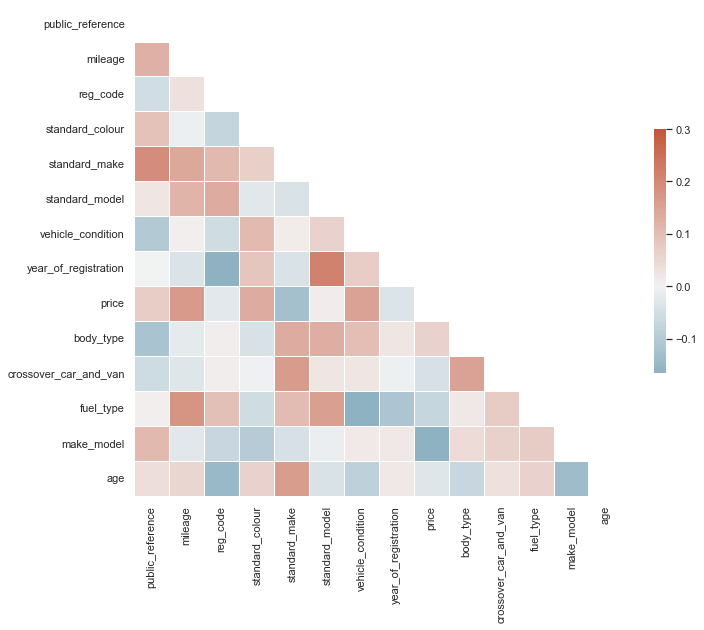

In [7]:
sns.set_theme(style="white")
rs = np.random.RandomState(33)
d = pd.DataFrame(data=rs.normal(size=(100, 14)),
                 columns=list(data))
corr = d.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

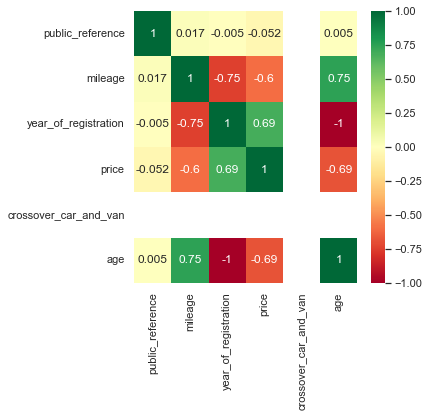

In [8]:
corrmat=data.corr()
top_corr_features=corrmat.index
plt.figure(figsize=(5,5))
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

The heatmap shows some useful insights:
Correlation of target variable “Price” with independent variables:
* Price is highly (positively) correlated with year_of_registration (0.69)
* Price is negatively correlated to public_reference (-0.005), mileage (-0.6) and age (-0.69). This suggest that cars having high mileage may fall in the ‘economy’ cars category, and are priced lower.
* There's no correlation between price and crossover_car_and_van because crossover_car_and_van is "False"

### **3. Data Cleaning & Preparation**
Checking if dataset contains null values

In [9]:
data.isnull().sum()

public_reference          0
mileage                  22
reg_code                 12
standard_colour           0
standard_make             0
standard_model            0
vehicle_condition         0
year_of_registration      0
price                     0
body_type                 0
crossover_car_and_van     0
fuel_type                 0
make_model                0
age                       0
dtype: int64

In [10]:
clean_mileage_data = data[~data.mileage.isnull()]
clean_mileage_data

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type,make_model,age
0,202010014440649,31534.0,17,Grey,MINI,Hatch,USED,2017.0,19000,Hatchback,False,Petrol,MINI - Hatch,5
1,202010155026725,52023.0,66,Blue,Volkswagen,Golf,USED,2016.0,13500,Estate,False,Diesel,Volkswagen - Golf,6
2,202008142485309,29500.0,12,Grey,Mercedes-Benz,C Class,USED,2012.0,9495,Saloon,False,Petrol,Mercedes-Benz - C Class,10
3,202009183894045,35300.0,18,Grey,Vauxhall,Corsa,USED,2018.0,7293,Hatchback,False,Petrol,Vauxhall - Corsa,4
4,202010014441671,47299.0,65,Black,Nissan,Qashqai,USED,2016.0,11500,SUV,False,Diesel,Nissan - Qashqai,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96264,202010295556637,28225.0,17,White,Mercedes-Benz,C Class,USED,2017.0,18499,Saloon,False,Diesel,Mercedes-Benz - C Class,5
96265,202010305614799,122000.0,07,Silver,BMW,3 Series,USED,2007.0,1990,Saloon,False,Petrol,BMW - 3 Series,15
96266,202010315639231,45000.0,15,Silver,Vauxhall,Corsa,USED,2015.0,5000,Hatchback,False,Petrol,Vauxhall - Corsa,7
96267,202010315647416,4075.0,69,Grey,Nissan,Juke,USED,2019.0,18000,SUV,False,Petrol,Nissan - Juke,3


In [11]:
clean_mileage_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96247 entries, 0 to 96268
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   public_reference       96247 non-null  int64  
 1   mileage                96247 non-null  float64
 2   reg_code               96235 non-null  object 
 3   standard_colour        96247 non-null  object 
 4   standard_make          96247 non-null  object 
 5   standard_model         96247 non-null  object 
 6   vehicle_condition      96247 non-null  object 
 7   year_of_registration   96247 non-null  float64
 8   price                  96247 non-null  int64  
 9   body_type              96247 non-null  object 
 10  crossover_car_and_van  96247 non-null  bool   
 11  fuel_type              96247 non-null  object 
 12  make_model             96247 non-null  object 
 13  age                    96247 non-null  int64  
dtypes: bool(1), float64(2), int64(3), object(8)
memory usa

In [12]:
## Drop reg_code and public_reference because the column does not provide any useful correlation or meaning to the price and hence should be dropped
clean_data = clean_mileage_data.drop(["reg_code", "public_reference"], axis = 1)
clean_data

,mileage,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type,make_model,age
0,31534.0,Grey,MINI,Hatch,USED,2017.0,19000,Hatchback,False,Petrol,MINI - Hatch,5
1,52023.0,Blue,Volkswagen,Golf,USED,2016.0,13500,Estate,False,Diesel,Volkswagen - Golf,6
2,29500.0,Grey,Mercedes-Benz,C Class,USED,2012.0,9495,Saloon,False,Petrol,Mercedes-Benz - C Class,10
3,35300.0,Grey,Vauxhall,Corsa,USED,2018.0,7293,Hatchback,False,Petrol,Vauxhall - Corsa,4
4,47299.0,Black,Nissan,Qashqai,USED,2016.0,11500,SUV,False,Diesel,Nissan - Qashqai,6
...,...,...,...,...,...,...,...,...,...,...,...,...
96264,28225.0,White,Mercedes-Benz,C Class,USED,2017.0,18499,Saloon,False,Diesel,Mercedes-Benz - C Class,5
96265,122000.0,Silver,BMW,3 Series,USED,2007.0,1990,Saloon,False,Petrol,BMW - 3 Series,15
96266,45000.0,Silver,Vauxhall,Corsa,USED,2015.0,5000,Hatchback,False,Petrol,Vauxhall - Corsa,7
96267,4075.0,Grey,Nissan,Juke,USED,2019.0,18000,SUV,False,Petrol,Nissan - Juke,3


In [13]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96247 entries, 0 to 96268
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   mileage                96247 non-null  float64
 1   standard_colour        96247 non-null  object 
 2   standard_make          96247 non-null  object 
 3   standard_model         96247 non-null  object 
 4   vehicle_condition      96247 non-null  object 
 5   year_of_registration   96247 non-null  float64
 6   price                  96247 non-null  int64  
 7   body_type              96247 non-null  object 
 8   crossover_car_and_van  96247 non-null  bool   
 9   fuel_type              96247 non-null  object 
 10  make_model             96247 non-null  object 
 11  age                    96247 non-null  int64  
dtypes: bool(1), float64(2), int64(2), object(7)
memory usage: 8.9+ MB


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


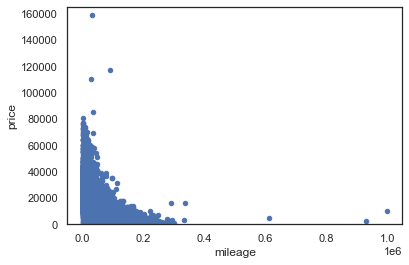

In [14]:
mil = "mileage"
data = pd.concat([clean_data["price"], clean_data[mil]], axis=1)
data.plot.scatter(x=mil, y="price", ylim=(0,165000));

### Plotting a heat map to analyze the clean_data and keep an eye on the co-relation between labels

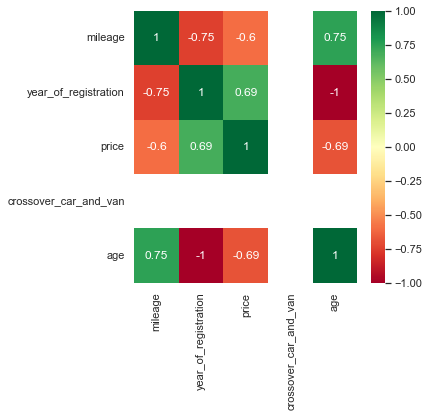

In [15]:
corrmat=clean_data.corr()
top_corr_features=corrmat.index
plt.figure(figsize=(5,5))
g=sns.heatmap(clean_data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

### Plotting a histogram to visualize the cars mileage in accordance with the clean_data.

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'mileage clean_data distribution')

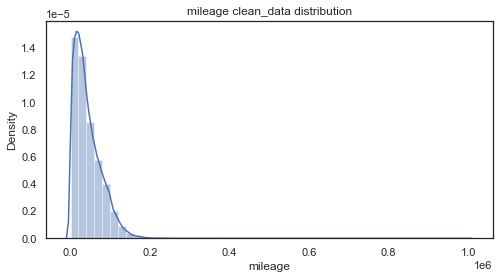

In [16]:
fig=plt.figure(figsize=(8,4))
sns.distplot(clean_data['mileage'])
plt.title('mileage clean_data distribution')

### Handling and removing the Outliers of price and mileage

An outlier is a data point that is noticeably different from the rest. They represent errors in measurement, bad data collection, or simply show variables not considered when collecting the data.

We use the Inter-quartile range method to determine and cutoff outliers and hence reduce the presence of noise.

The values for `IQR` for each column is as listed below:
- IQR value for column `mileage` is: 45000.0
- IQR value for column `price` is: 8665.0

After using this cut-off the end result is a new DataFrame with a shape of (91909, 14).

<AxesSubplot:xlabel='price'>

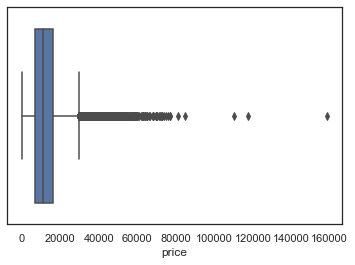

In [17]:
sns.boxplot(x=clean_mileage_data["price"])

<AxesSubplot:xlabel='mileage'>

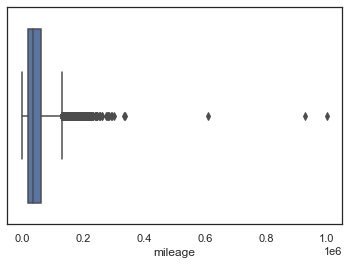

In [18]:
sns.boxplot(x=clean_mileage_data["mileage"])

### Removing the outliers 

In [19]:
def removeOutliers(data, col):
    Q3 = np.quantile(data[col], 0.75)
    Q1 = np.quantile(data[col], 0.25)
    IQR = Q3 - Q1
 
    print("IQR value for column %s is: %s" % (col, IQR))
    global outlier_free_list
    global filtered_data
 
    lower_range = Q1 - 1.5 * IQR
    upper_range = Q3 + 1.5 * IQR
    outlier_free_list = [x for x in data[col] if (
        (x > lower_range) & (x < upper_range))]
    filtered_data = data.loc[data[col].isin(outlier_free_list)]
    return filtered_data

In [20]:
outlier_free_mileage = removeOutliers(clean_mileage_data, "mileage")
outlier_free_price = removeOutliers(outlier_free_mileage, "price")

IQR value for column mileage is: 45000.0
IQR value for column price is: 8665.0


In [21]:
outlier_free_data = outlier_free_price

In [22]:
outlier_free_data.shape

(91909, 14)

<AxesSubplot:xlabel='price'>

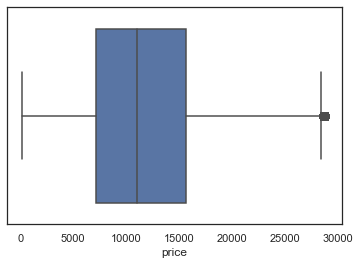

In [23]:
sns.boxplot(x=outlier_free_data["price"])

<AxesSubplot:xlabel='mileage'>

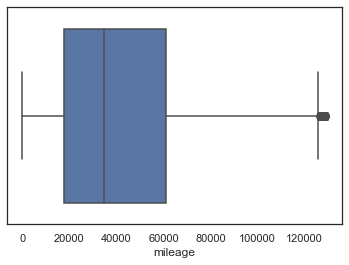

In [24]:
sns.boxplot(x=outlier_free_data["mileage"])

In [25]:
y = outlier_free_data['price']  
y

0        19000
1        13500
2         9495
3         7293
4        11500
         ...  
96264    18499
96265     1990
96266     5000
96267    18000
96268     7250
Name: price, Length: 91909, dtype: int64

In [26]:
X = outlier_free_data.drop(['price'], axis=1)
X

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,body_type,crossover_car_and_van,fuel_type,make_model,age
0,202010014440649,31534.0,17,Grey,MINI,Hatch,USED,2017.0,Hatchback,False,Petrol,MINI - Hatch,5
1,202010155026725,52023.0,66,Blue,Volkswagen,Golf,USED,2016.0,Estate,False,Diesel,Volkswagen - Golf,6
2,202008142485309,29500.0,12,Grey,Mercedes-Benz,C Class,USED,2012.0,Saloon,False,Petrol,Mercedes-Benz - C Class,10
3,202009183894045,35300.0,18,Grey,Vauxhall,Corsa,USED,2018.0,Hatchback,False,Petrol,Vauxhall - Corsa,4
4,202010014441671,47299.0,65,Black,Nissan,Qashqai,USED,2016.0,SUV,False,Diesel,Nissan - Qashqai,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
96264,202010295556637,28225.0,17,White,Mercedes-Benz,C Class,USED,2017.0,Saloon,False,Diesel,Mercedes-Benz - C Class,5
96265,202010305614799,122000.0,07,Silver,BMW,3 Series,USED,2007.0,Saloon,False,Petrol,BMW - 3 Series,15
96266,202010315639231,45000.0,15,Silver,Vauxhall,Corsa,USED,2015.0,Hatchback,False,Petrol,Vauxhall - Corsa,7
96267,202010315647416,4075.0,69,Grey,Nissan,Juke,USED,2019.0,SUV,False,Petrol,Nissan - Juke,3


In [27]:
outlier_free_data.head()

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type,make_model,age
0,202010014440649,31534.0,17,Grey,MINI,Hatch,USED,2017.0,19000,Hatchback,False,Petrol,MINI - Hatch,5
1,202010155026725,52023.0,66,Blue,Volkswagen,Golf,USED,2016.0,13500,Estate,False,Diesel,Volkswagen - Golf,6
2,202008142485309,29500.0,12,Grey,Mercedes-Benz,C Class,USED,2012.0,9495,Saloon,False,Petrol,Mercedes-Benz - C Class,10
3,202009183894045,35300.0,18,Grey,Vauxhall,Corsa,USED,2018.0,7293,Hatchback,False,Petrol,Vauxhall - Corsa,4
4,202010014441671,47299.0,65,Black,Nissan,Qashqai,USED,2016.0,11500,SUV,False,Diesel,Nissan - Qashqai,6


In [28]:
valid_categorical_cols = outlier_free_data[['standard_colour', 'body_type','fuel_type','make_model']]
encoded_cols = pd.get_dummies(valid_categorical_cols)
encoded_cols.head()

,standard_colour_Black,standard_colour_Blue,standard_colour_Grey,standard_colour_Silver,standard_colour_White,body_type_Coupe,body_type_Estate,body_type_Hatchback,body_type_SUV,body_type_Saloon,...,make_model_Mercedes-Benz - C Class,make_model_Mercedes-Benz - E Class,make_model_Nissan - Juke,make_model_Nissan - Qashqai,make_model_Renault - Clio,make_model_Toyota - Yaris,make_model_Vauxhall - Astra,make_model_Vauxhall - Corsa,make_model_Volkswagen - Golf,make_model_Volkswagen - Polo
0,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [29]:
complete_data = pd.concat([encoded_cols, outlier_free_data[['mileage', "price"]]], axis = 1)
complete_data

,standard_colour_Black,standard_colour_Blue,standard_colour_Grey,standard_colour_Silver,standard_colour_White,body_type_Coupe,body_type_Estate,body_type_Hatchback,body_type_SUV,body_type_Saloon,...,make_model_Nissan - Juke,make_model_Nissan - Qashqai,make_model_Renault - Clio,make_model_Toyota - Yaris,make_model_Vauxhall - Astra,make_model_Vauxhall - Corsa,make_model_Volkswagen - Golf,make_model_Volkswagen - Polo,mileage,price
0,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,31534.0,19000
1,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,52023.0,13500
2,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,29500.0,9495
3,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,35300.0,7293
4,1,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,47299.0,11500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96264,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,28225.0,18499
96265,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,122000.0,1990
96266,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,45000.0,5000
96267,0,0,1,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,4075.0,18000


In [30]:
X = X.apply(pd.to_numeric, errors='coerce')
y = y.apply(pd.to_numeric, errors='coerce')

In [31]:
X.fillna(0, inplace=True)
y.fillna(0, inplace=True)

### Splitting the data

Splitting the data into test and train set using library, the ratio being 80% Training data and 20% Test data.

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=40)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(73527, 13) (18382, 13) (73527,) (18382,)


In [33]:
scaler = OneHotEncoder(handle_unknown='ignore')
scaler.fit_transform(X)

<91909x133180 sparse matrix of type '<class 'numpy.float64'>'
	with 1194817 stored elements in Compressed Sparse Row format>

### **4. Models Building and Evaluation**

### Model selection and tuning

We can also try different machine learning models to improve performance. Each algorithm has different strengths and weaknesses, and so we need to select the algorithm that works best with 
our specific data. We will use the Scikit-learn library to compare the performance of the following algorithms:

* [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) - Linear regression
* [RandomForestRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html) - Random Forest Regressor.
* [Ridge Regressor](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html) - Ridge Regressor
* [Lasso Regressor](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) - Lasso Regressor

We will be giving more detailed information on Linear Regression and Random Forest Regresson only becacause there is little difference between Linear Regression, Ridge Regresson and Lasso Regresson

### Linear regression

In [34]:
model = LinearRegression()

In [35]:
model.fit(X_train, y_train)

LinearRegression()

In [36]:
y_pred = model.predict(X_test)
y_pred

array([12472.86499912,  9571.46569135, 14659.52644279, ...,
       14679.09168914,  6247.08228409, 18524.37274458])

In [37]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 score : %f" % r2_score(y_test,y_pred))

Mean Absolute Error: 3191.863452420912
Mean Squared Error: 16802946.914066438
Root Mean Squared Error: 4099.139777327243
R2 score : 0.565835


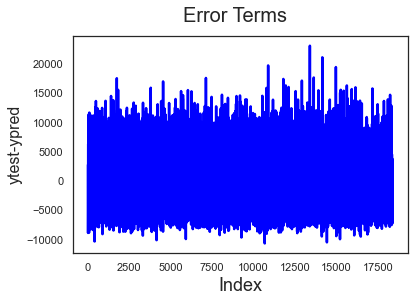

In [38]:
# Error terms

error = [i for i in range(len(y_pred))]
fig = plt.figure()
plt.plot(error,y_test-y_pred, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)               
plt.xlabel('Index', fontsize=18)                      
plt.ylabel('ytest-ypred', fontsize=16)                
plt.show()

### Plotting the error terms to understand the distribution.

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


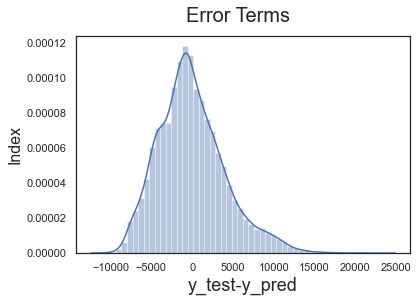

In [39]:
fig = plt.figure()
sns.distplot((y_test-y_pred),bins=50)
fig.suptitle('Error Terms', fontsize=20)                   
plt.xlabel('y_test-y_pred', fontsize=18)                  
plt.ylabel('Index', fontsize=16)                          
plt.show()

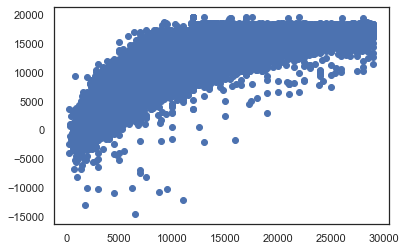

In [40]:
plt.scatter(y_test,y_pred)

### Random Forest Regressor

In [41]:
random_forest_regressor=RandomForestRegressor()
random_forest_regressor.fit(X_train,y_train)

RandomForestRegressor()

In [42]:
model2 = RandomForestRegressor(n_estimators=400)
model2.fit(X_train, y_train)
y_pred2 = model2.predict(X_test)
y_pred2

array([11084.925     ,  8689.43      , 14629.47458333, ...,
       14531.88229167,  7360.75175   , 19199.85744235])

In [43]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred2))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred2))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred2)))
print("R2 score : %f" % r2_score(y_test,y_pred2))

Mean Absolute Error: 3192.305237745663
Mean Squared Error: 17875189.56700304
Root Mean Squared Error: 4227.906049926257
R2 score : 0.538130


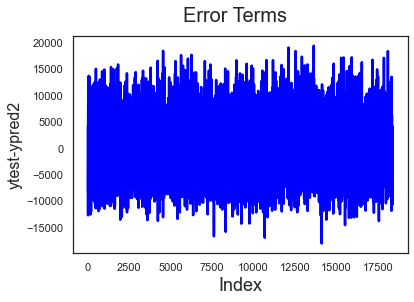

In [44]:
# Error terms

error = [i for i in range(len(y_pred2))]
fig = plt.figure()
plt.plot(error,y_test-y_pred2, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)               
plt.xlabel('Index', fontsize=18)                      
plt.ylabel('ytest-ypred2', fontsize=16)                
plt.show()

### Plotting the error terms to understand the distribution.

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


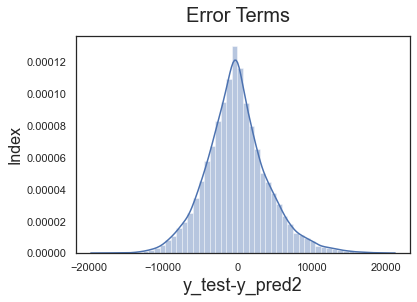

In [45]:
fig = plt.figure()
sns.distplot((y_test-y_pred2),bins=50)
fig.suptitle('Error Terms', fontsize=20)                   
plt.xlabel('y_test-y_pred2', fontsize=18)                  
plt.ylabel('Index', fontsize=16)                          
plt.show()

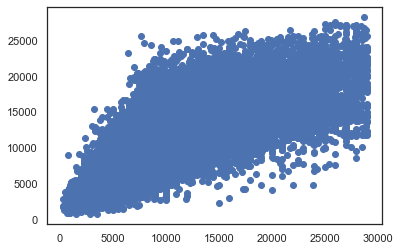

In [46]:
plt.scatter(y_test,y_pred2)

### Ridge Regressor

In [47]:
model3 = Ridge(alpha=1.0)
model3.fit(X_train, y_train)
y_pred3 = model3.predict(X_test)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.07325e-25): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


In [48]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred3))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred3))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred3)))
print("R2 score : %f" % r2_score(y_test,y_pred3))

Mean Absolute Error: 3191.8634754609907
Mean Squared Error: 16802947.120478284
Root Mean Squared Error: 4099.139802504702
R2 score : 0.565835


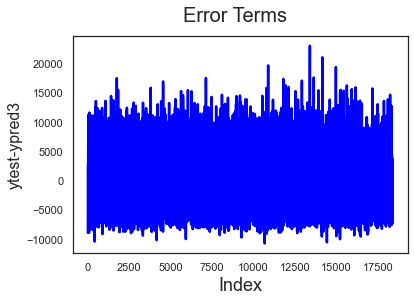

In [49]:
# Error terms

error = [i for i in range(len(y_pred3))]
fig = plt.figure()
plt.plot(error,y_test-y_pred3, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)               
plt.xlabel('Index', fontsize=18)                      
plt.ylabel('ytest-ypred3', fontsize=16)                
plt.show()

### Plotting the error terms to understand the distribution.

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


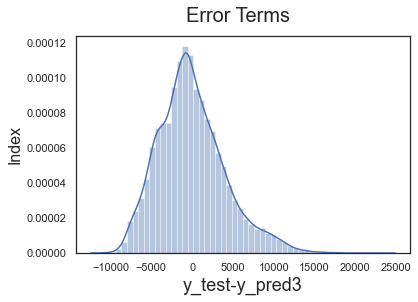

In [50]:
fig = plt.figure()
sns.distplot((y_test-y_pred3),bins=50)
fig.suptitle('Error Terms', fontsize=20)                   
plt.xlabel('y_test-y_pred3', fontsize=18)                  
plt.ylabel('Index', fontsize=16)                          
plt.show()

### Lasso Regressor

In [51]:
model4 = Lasso(alpha=1.0)
model4.fit(X_train, y_train)
y_pred4 = model4.predict(X_test)

In [52]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred4))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred4))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred4)))
print("R2 score : %f" % r2_score(y_test,y_pred4))

Mean Absolute Error: 3191.8674697954616
Mean Squared Error: 16802981.53215776
Root Mean Squared Error: 4099.143999929468
R2 score : 0.565834


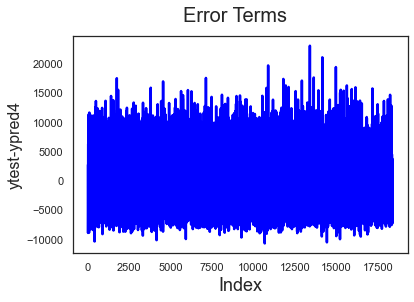

In [53]:
# Error terms

error = [i for i in range(len(y_pred4))]
fig = plt.figure()
plt.plot(error,y_test-y_pred4, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)               
plt.xlabel('Index', fontsize=18)                      
plt.ylabel('ytest-ypred4', fontsize=16)                
plt.show()

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


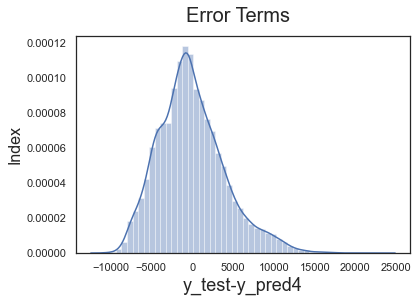

In [54]:
fig = plt.figure()
sns.distplot((y_test-y_pred4),bins=50)
fig.suptitle('Error Terms', fontsize=20)                   
plt.xlabel('y_test-y_pred4', fontsize=18)                  
plt.ylabel('Index', fontsize=16)                          
plt.show()

### **5. Conclusion**

The error terms are normally distributed with mean approximately 0.

The overall best performing model and parameters for VehicleTrader according to the models above is the `Linear Regression with R2 score of 56.5%.

Although `Ridge` and `Lason` with `R2 score of 56.5%` works but a more accurate `R2 score` is the `Linear Regression` and it is the most used and recognized among the models.  

Ridge result may not be accurate, therefore, `VehicleTrader` in `real world usage` of this results would do best to give equal trials to both `Linear` and `Lason` to see the response of both models to day to day real world data, and further 
know the model with the best performance.

`Random Forest Regressor`  with R2 score of 53.8% seemed to perform the worst compared to the other models. 